In [1]:
##...Import all required packages
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
##...Load categories of training data
CATEGORIES = pd.read_csv('./mammography_images/Training_set.csv')

In [3]:
##...Print head of categories
CATEGORIES.head()

,filename,label
0,Image_1.jpg,Density3Benign
1,Image_2.jpg,Density1Benign
2,Image_3.jpg,Density1Malignant
3,Image_4.jpg,Density1Benign
4,Image_5.jpg,Density1Malignant


In [4]:
##...Rename label values to make suitable for tensorflow
mapping = {'Density1Benign':0,
           'Density2Benign':1,
           'Density3Benign':2,
           'Density4Benign':3,
           'Density1Malignant':4,
           'Density2Malignant':5,
           'Density3Malignant':6,
           'Density4Malignant':7}

In [5]:
for i in range(len(CATEGORIES['label'])):
    CATEGORIES['label'][i] = mapping[CATEGORIES['label'][i]] 
CATEGORIES.head()

,filename,label
0,Image_1.jpg,2
1,Image_2.jpg,0
2,Image_3.jpg,4
3,Image_4.jpg,0
4,Image_5.jpg,4


In [6]:
##...Count of distinct labels
category_count = CATEGORIES['label'].nunique()
category_count

8

In [7]:
##...Path of training images
path = './mammography_images/train'

In [8]:
##...Function to separate both features & labels from training data
def seggregate_data(training_data):
    X = []
    Y = []
    for features, lables in training_data:
        X.append(features)
        Y.append(lables)
    X = np.array(X)
    Y = np.array(Y)
    return X,Y

In [9]:
##...Load each image from path metioned and label it from categories.
training_data =[]
for i in range(len(CATEGORIES['filename'])):
    img_array = cv2.imread(os.path.join(path,CATEGORIES['filename'][i]) , cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(100,100))
    training_data.append([new_array,CATEGORIES['label'][i]])
    
features,labels = seggregate_data(training_data)

In [10]:
##...Check shape of sample image
features[0].shape

(100, 100)

In [11]:
labels

array([2, 0, 4, ..., 5, 0, 2])

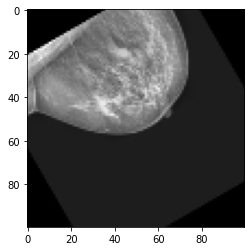

In [12]:
##...Plot a sample image to cross verify
IMG_SIZE = 100
plt.imshow(features.reshape(features.shape[0], IMG_SIZE, IMG_SIZE)[0], cmap ='gray')
plt.show()

In [13]:
##...Normalize features and convert labels to categorical for training the model
x_train = features.reshape(features.shape[0], 100, 100, 1)
x_train = x_train.astype('float32')
x_train /= 255
y_train = tf.keras.utils.to_categorical(labels, category_count)

In [68]:
##...Compile model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(100,100,1)))
model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(category_count,activation=tf.nn.softmax))

model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [60]:
##...Train the model compiled above
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
179/179 [==============================] - 54s 302ms/step - loss: 0.7165 - accuracy: 0.7306
Epoch 2/10
179/179 [==============================] - 58s 324ms/step - loss: 0.4980 - accuracy: 0.8159
Epoch 3/10
179/179 [==============================] - 65s 364ms/step - loss: 0.3471 - accuracy: 0.8742
Epoch 4/10
179/179 [==============================] - 63s 352ms/step - loss: 0.2630 - accuracy: 0.9086
Epoch 5/10
179/179 [==============================] - 63s 353ms/step - loss: 0.2086 - accuracy: 0.9277
Epoch 6/10
179/179 [==============================] - 63s 353ms/step - loss: 0.1606 - accuracy: 0.9457
Epoch 7/10
179/179 [==============================] - 60s 338ms/step - loss: 0.1480 - accuracy: 0.9462
Epoch 8/10
179/179 [==============================] - 59s 331ms/step - loss: 0.1116 - accuracy: 0.9635
Epoch 9/10
179/179 [==============================] - 61s 338ms/step - loss: 0.1184 - accuracy: 0.9598
Epoch 10/10
179/179 [==============================] - 63s 355ms/step - l

In [16]:
##...Load categories of testing data
CATEGORIES_test = pd.read_csv('./mammography_images/Testing_set.csv')

In [17]:
##...Print head of test categories
CATEGORIES_test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [18]:
##...Path of testing images
path_test = './mammography_images/test'

In [19]:
##...Load each image from path metioned and label it from categories.
testing_data =[]
for i in range(len(CATEGORIES_test['filename'])):
    img_array = cv2.imread(os.path.join(path_test,CATEGORIES_test['filename'][i]) , cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(100,100))
    testing_data.append([new_array])
    

In [20]:
X_test_features = []
for features in testing_data:
    X_test_features.append(features)
X_test_features = np.array(X_test_features)    

In [21]:
##...Normalize features for prediction
x_test = X_test_features.reshape(X_test_features.shape[0], 100, 100, 1)
x_test = x_test.astype('float32')
x_test /= 255

In [61]:
##...Predict using prepared testing data
model_predictions=model.predict(x_test)

In [62]:
##...Perform argmax on predicted labels
pred_Categories = []
for i in model_predictions:
    pred_Categories.append(np.argmax(i))

In [63]:
##...Reverse mapping for predicted values
reverse_mapping = {0:'Density1Benign',
           1:'Density2Benign',
           2:'Density3Benign',
           3:'Density4Benign',
           4:'Density1Malignant',
           5:'Density2Malignant',
           6:'Density3Malignant',
           7:'Density4Malignant'}

In [64]:
##...Rename label with actual values for predicted values
predicted_Categories = []
for i in pred_Categories:
    predicted_Categories.append(reverse_mapping[i])

In [65]:
##...Combine predicted labels with filename
CATEGORIES_test['label'] = predicted_Categories

In [66]:
##...Print head of test categories
CATEGORIES_test.head()

,filename,label
0,Image_1.jpg,Density3Benign
1,Image_2.jpg,Density1Benign
2,Image_3.jpg,Density2Malignant
3,Image_4.jpg,Density1Benign
4,Image_5.jpg,Density3Malignant


In [67]:
##...Save the predicted values to csv file
CATEGORIES_test.to_csv('predicted_values5.csv', sep=',', encoding='utf-8')